<h1 align="center"> Machine Learning | 2024</h1>
<br>
<p style="text-align: center;align:center"><font size = 5>Polynomial Regression</font></p>
<div style="align:center;"> <img src="Images/Nourzad.jpg" width="100" height="100"/> </div>
<h3 align="center">Abdulrahman Nourzad
<br>
<font color="black">
        <em style="align:center; font-size:10pt; color:brown;">
            Masters in Computer Software Engineer & Post DBA in Business Intelligence 
        </em>
</font>
</h3>
<br>
<br>
<br>

### Project: Predicting House Prices with Polynomial Regression Algorithm using Python

# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from summarytools import dfSummary
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Read Data

### The Boston house-price data

 Variables in order:
 
 <b>CRIM: </b>     per capita crime rate by town
 
 <b>ZN: </b>       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 <b>INDUS: </b>    proportion of non-retail business acres per town
 
 <b>CHAS: </b>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 <b>NOX: </b>      nitric oxides concentration (parts per 10 million)
 
 <b>RM: </b>       average number of rooms per dwelling
 
 <b>AGE: </b>      proportion of owner-occupied units built prior to 1940
 
 <b>DIS: </b>      weighted distances to five Boston employment centres
 
 <b>RAD: </b>      index of accessibility to radial highways
 
 <b>TAX: </b>      full-value property-tax rate per 10,000
 
 <b>PTRATIO: </b>  pupil-teacher ratio by town
 
 <b>B: </b>        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 <b>LSTAT: </b>    % lower status of the population
 
 <b>MEDV: </b>     Median value of owner-occupied homes in 1000's

In [2]:
#Naming columns and MEDV rename to Price
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']

boston_data = pd.read_csv('dataset/Boston_house_price.csv', delimiter="\s+", names=column_names)  #delimiter is space.

In [3]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### Convert data type:

In [5]:
# Convert data type of CHAS variable from int64 to category 
boston_data["CHAS"] = boston_data["CHAS"].astype('category')

In [6]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(1), float64(12), int64(1)
memory usage: 52.1 KB


In [7]:
# Display the shape of dataset
boston_data.shape

(506, 14)

In [8]:
# Descriptive statistics of the dataset
boston_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Step 3: preprocessing

### 3-1: Checking Missing Values

In [9]:
# Checking the data contains any null values or not:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

#### Result: No Missing Values

### 3-2: Checking duplicate values

In [10]:
dfSummary(boston_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CRIM[float64],Mean (sd) : 3.6 (8.6)min < med < max:0.0 < 0.3 < 89.0IQR (CV) : 3.6 (0.4),504 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3XwW7aQBRG4TuF0AEqG0RrdmzZdcGSh+jD5iG85T2QDLKFY8cITXfdVC2xHSv5k/Otmcssjsa6LoRgwHv35a0vALzE+N4PnHNTM5t0nN+EEKqOZ4E//huqc266Wq1+RVG07DK8KIqzc+6RWNHXvRd1EkXRcr/fV3Ec120G53nu0zRdZlk2MTNCRS93P/1mZnEc10mSPHWYP+1wBvgLyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjIccfrvdHswscs51HdGEEKpXvBJEDRZqWZYP1+v152azGY1Go7rLjKIozs65R2LFYKE2TTP23s92u129Xq/Pbc/nee7TNF1mWTYxM0L95Ab99JuZzefzOkmSp47Hp696GchimYKEwV/UPnouYyxiH8i7DbXvMsYi9rG8KNQ8z33bwZfLxZuZlWXpj8fjrO350+n0zXs/2263brFYPLc5W1XV18Ph8CPLsu/OuaLtf+NNPIcQ/vkg/QZ/9H9FrqlyrQAAAABJRU5ErkJggg=="">",0(0.0%)
2,ZN[float64],Mean (sd) : 11.4 (23.3)min < med < max:0.0 < 0.0 < 100.0IQR (CV) : 12.5 (0.5),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3YP2/aQBjH8ef4V5O65yAqsrF0yFCpQ0YvfQd9sVm7dSBSt2Rnj6KQYATBxXLcKVWlSiE+B8Ev/X5mnuNkvtjyuaqqDDh0rX1vAHiJzrYPOOf6ZtYLXH9TVdU6cBb449lQnXP94XD4zXs/CFl8sVjcO+fOiRVNbbuj9rz3gzRN10mS5HUWzrIsmkwmg9ls1jMzQkUjWx/9ZmZJkuSj0eghYP1+wAzwD16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaGz7w08xznXN7Ne4Pimqqr1a+4H+3OwoTrn+sPh8Jv3fhAyv1gs7p1z58T6NhxsqGbW894P0jRdJ0mS1xnMsiyaTCaD2WzWMzNCfQMOOVQzM0uSJB+NRg8Bo/1X3wz2hpcpSCBUSDj4R3+osiy7Zuadc6FL/HenBg1PWcx2eM12GmrDWPzj42M3ZHC1WnWLovgyHo/b7Xa71ovYk/l8vnTOfTezkHm5yJuespjt9prtLNSmsRRFEZVl+TnP8x9mVutlarPZdKIoOjo7O8tPTk7u63739fX1h4uLi6/j8fhjyN4b/mAtM3sMmGs67+M4HqVpuqh7ymLW/JptO058UahZlkV1v/ju7i6Ooujo9PTUHR8f/6o7f3t7G02n06Msy97f3Nxs6swul8va+/1bURSd0L3P5/P48vIy6Acry7K7Wq0+xXE8bbVaRb1dN5t/ujEURfHTAv5gTa7Zer1+d3V19exx4m+QwfBRWCqPkwAAAABJRU5ErkJggg=="">",0(0.0%)
3,INDUS[float64],Mean (sd) : 11.1 (6.9)min < med < max:0.5 < 9.7 < 27.7IQR (CV) : 12.9 (1.6),76 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC1klEQVR4nO3dsW7aQBjA8e8KgQsgG4REtqwMlTpk5CH6sH2EDDxBViY2FEBGoaGAoVMqVQ0B39nNfcf/tx+xdH9ZtnNnm+PxKEDovnz2AQCXqH/2AeBvxphbEWl4/MT2eDy+lnU8oSDUgBhjbvv9/vckSXquv7FarZbGmB+xxUqoYWkkSdIbjUavaZpuig7OssyOx+PefD5viAiholppmm4Gg8FPx+G3pR5MILiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoEPTqKc9FxFEuIL5WwYbqu4g41gXE16rSUD3PiEmn0xmMRqNV0UXEMS8gvlaVhep7RtztdjbP86/NZvPRcRFxlAuIr1WVZ1SvbRXT6bT39PTU2u/3tSoODrpUfo3quq1iuVxyRsQfPJ6CCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFswunPfY9JYfD4cZhHPCPD0P12ff0tudps9k8iojrhxMAETl/RnXe98SeJ5Tpoj1TLvue2POEMnEzBRWCfVMK3OR5fiMiiTHGZXiwr0GKNlTPCRMJeNJOWa/XN7vd7tv9/X2tVqsVfpdCyK9BijJU3wkTCXvSTtlut3Vrbevh4WFzd3e3LDI29NcgRRmqz4SJhD9p57TbbddvqQZ7AxxlqG88Jkwk4Em7Rtz1QwVChQqEChUIFSoQKlQgVKhAqFCBUKFC1A/8fcS6uEMrQn1HzIs7tCLUd8S8uEMrQv1AjIs7tCJUlKbKb9cSKkpR9bdrCRVlcd6xfMl1PaGiVK5fapQz1/WEWgGPZ7C8XeYEQi2ZzzNY3i5z2kWhZllmi/7wy8uLFRFZr9d2Npu1/uf4z/zbi8WiY61tDYdD0+12fxUZ+/z8bCeTSSvLsvZsNtsWGSvid9xZltk8z+vi/t+45HA41F1auWTMbx/bcEmt0Jy1AAAAAElFTkSuQmCC"">",0(0.0%)
4,CHAS[category],1. 02. 1,471 (93.1%)35 (6.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLi

#### Results: No duplicate values and No missing values

### 3-3: drop unnecessary Variables

In [11]:
#I drop CHAS column because Regression works on Continuous data, not on Discrete data.
boston_data.drop('CHAS', inplace=True, axis=1) 
boston_data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 3-4: Check and remove Outlier data

#### defination IQR function

In [12]:
#function for calculate the IQR critrion
def iqr_func(data):
    q3, q1 = np.percentile(data, [75, 25])
    iqr = q3 - q1
    return iqr

#### detect outlier in data with IQR

In [13]:
#function for detect outliers in data, base on IQR criterion
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data , [75, 25])
    iqr = q3 - q1
    for i in data:
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier 

#### check Outliers

In [14]:
column_names = list(boston_data.columns)
df = pd.DataFrame()
for name in column_names:
    df[name] = outlier_func(boston_data[name])

In [15]:
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#Objective: Find the sum of outliers in each record
data_rowsum = df.sum(axis = 1)
data_rowsum

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64

In [17]:
list(data_rowsum[data_rowsum == 3].index) # The Index list of records countains outliers.

[195, 203, 204, 257, 262, 267, 283, 367, 374, 384, 438]

#### Remove Outliers

In [18]:
n_outlier_feature = 3 
for j in range(len(boston_data)):
    if data_rowsum[j] >= n_outlier_feature :
        boston_data = boston_data.drop(j)

In [19]:
boston_data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Step 4: Data Visualization

### 4-1: displot

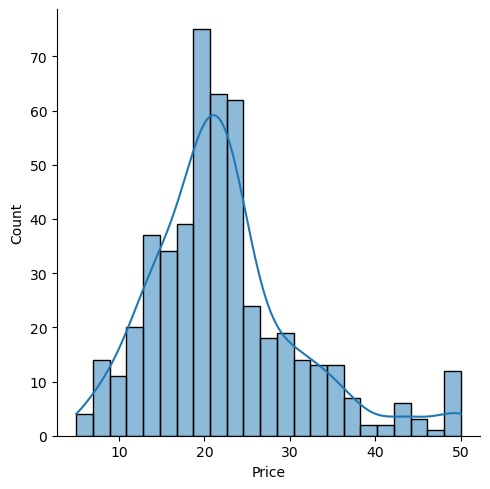

In [20]:
sns.displot(data=boston_data, x='Price', kde=True)
plt.show()

### 4-2: scatter plots

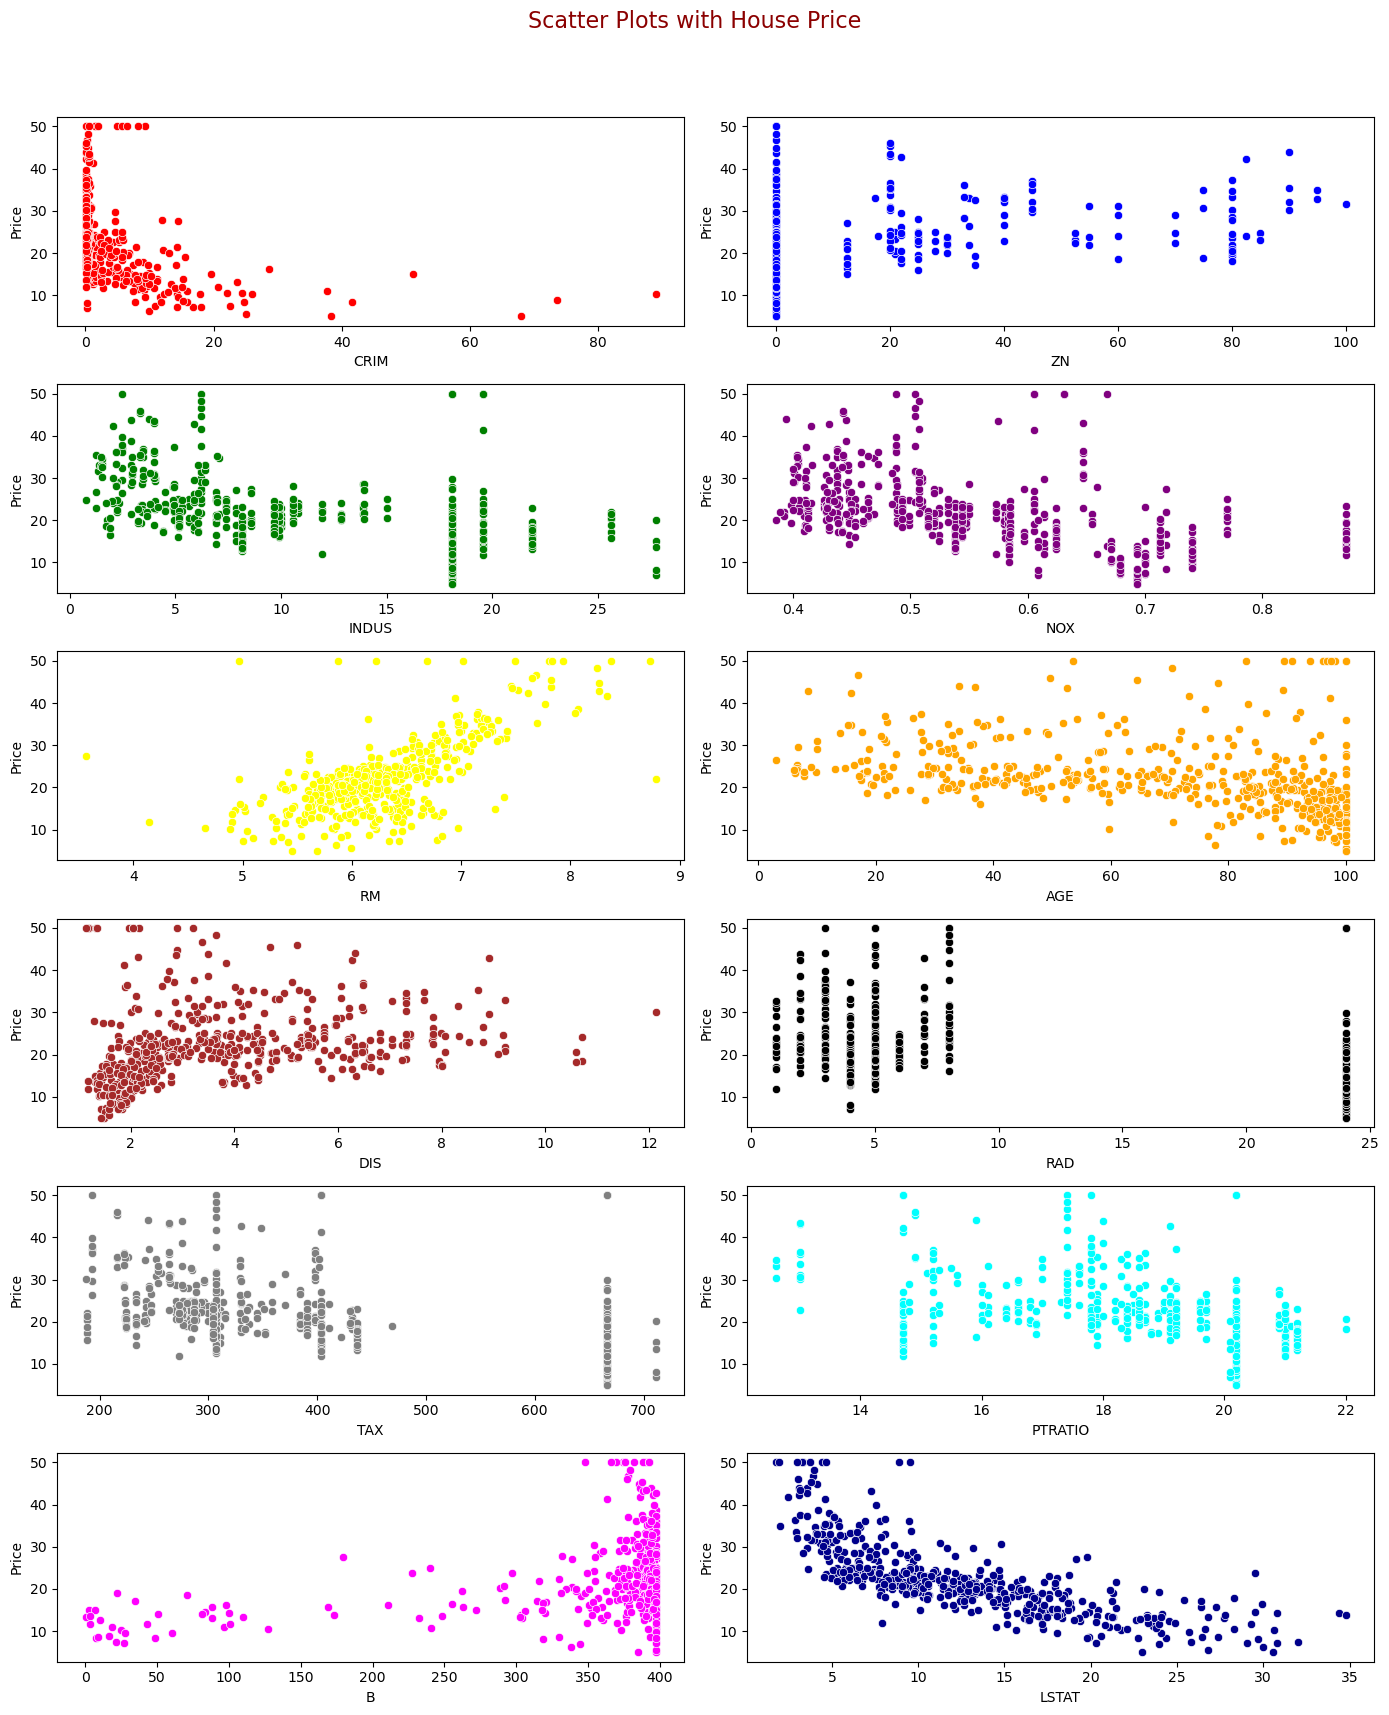

In [21]:
# Create scatter plots to explore the relationships between these variables and the house price.
# It will help us understand which factors might be influencing house prices more significantly:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18))
fig.suptitle('Scatter Plots with House Price', fontsize=16, color='darkred')

# Scatter plot for each variable against the house price
sns.scatterplot(data=boston_data, x='CRIM', y='Price', ax=axes[0, 0], c='red')
sns.scatterplot(data=boston_data, x='ZN', y='Price', ax=axes[0, 1], c='blue')
sns.scatterplot(data=boston_data, x='INDUS', y='Price', ax=axes[1, 0], c='green')
sns.scatterplot(data=boston_data, x='NOX', y='Price', ax=axes[1, 1], c='purple')
sns.scatterplot(data=boston_data, x='RM', y='Price', ax=axes[2, 0], c='yellow')
sns.scatterplot(data=boston_data, x='AGE', y='Price', ax=axes[2, 1], c='orange')
sns.scatterplot(data=boston_data, x='DIS', y='Price', ax=axes[3, 0], c='brown')
sns.scatterplot(data=boston_data, x='RAD', y='Price', ax=axes[3, 1], c='black')
sns.scatterplot(data=boston_data, x='TAX', y='Price', ax=axes[4, 0], c='gray')
sns.scatterplot(data=boston_data, x='PTRATIO', y='Price', ax=axes[4, 1], c='cyan')
sns.scatterplot(data=boston_data, x='B', y='Price', ax=axes[5, 0], c='magenta')
sns.scatterplot(data=boston_data, x='LSTAT', y='Price', ax=axes[5, 1], c='darkblue')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 4-3: Correlation Matrix

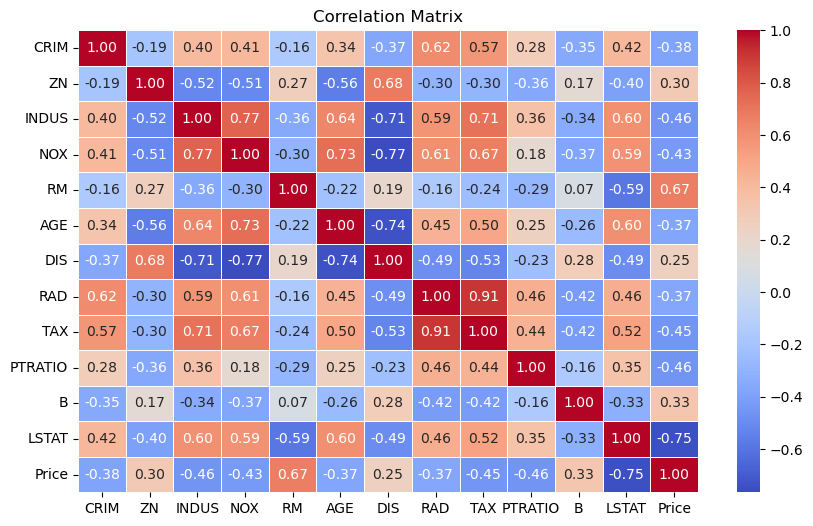

In [22]:
# it would be beneficial to perform a correlation analysis to quantify the relationships between these variables,
# especially how each one correlates with the house price:

# Correlation Matrix:>>>>>>>>> standard correlation coefficient
correlation_matrix = boston_data.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Results:

#### The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:
 1. LSTAT: This shows a  strong negative correlation with house price (- 0.75), implying that LSTAT is a strong predictor of price in this dataset.
2. RM: This shows a  strong positive correlation with house price (+ 0.67), implying that RM is a strong predictor of price in this dataset.
3. INDUS and PTRATIO and TAX: Displays a moderate negative downward correlation with house price (0.46).
4. The rest of the variables have a weak downward relationship with house price.

# Step 5: Determine X, y

In [23]:
X = boston_data.drop('Price', axis=1)

y = boston_data['Price']

In [24]:
X.shape

(493, 12)

In [25]:
y.shape

(493,)

# Step 6: Linear Regression

### 6-1: data scaling
The bigness or smallness of each feature is not the basis and criterion for the selection or role of that variable in modeling, and all variables will be important in terms of weight or coefficients created by the model. For this purpose, we use scaling.

In [26]:
mms = MinMaxScaler()
X_scale = mms.fit_transform(X) 
X_scaling = pd.DataFrame(X_scale) 
X_scaling.columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_scaling

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.058148,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.098366
1,0.000236,0.00,0.234444,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.224274
2,0.000236,0.00,0.234444,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.069613
3,0.000293,0.00,0.053333,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.036622
4,0.000705,0.00,0.053333,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.108959
...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.000633,0.00,0.414444,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.240315
489,0.000438,0.00,0.414444,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.222458
490,0.000612,0.00,0.414444,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.118341
491,0.001161,0.00,0.414444,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.143765


### 6-2: train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaling, y, test_size=0.3, random_state=101)

In [28]:
X_train.shape

(345, 12)

In [29]:
X_test.shape

(148, 12)

### 6-3: Creat the Model

In [30]:
#Model Initialization
LR = LinearRegression()

### 6-4: Train the Model

In [31]:
LR.fit(X_train, y_train)

LinearRegression()

In [32]:
LR.coef_

array([-10.59369857,   3.39661832,   1.49659655,  -6.75975535,
        15.84564638,  -0.21039676, -13.43294656,   5.8249284 ,
        -5.01309071,  -9.01060431,   3.8666758 , -21.09690371])

In [33]:
LR.intercept_

28.081925754939483

### 6-5: Prediction

In [34]:
y_pred = LR.predict(X_test)
y_pred

array([28.24674481, 16.706542  , 20.16937382, 29.75692621, 18.83248295,
       28.19184672, 19.20052172, 32.54216352,  9.30833724, 23.86340562,
       14.27567273, 27.23726992, 24.49680084, 23.34844547, 20.94238298,
       30.7255488 , 17.34413015, 20.88143495,  7.02297697, 34.61792616,
       21.40974934, 24.16072068, 24.86989475, 12.20277735, 14.74682702,
       25.10692061, 18.72311849, 25.93874697, 23.76707207, 27.17486279,
       14.16432438, 32.2279468 , 17.90481791, 29.34564031, 26.58004176,
       25.7433848 , 28.51323373, 33.78585813, 19.28403872, 30.33564321,
       20.96134438, 37.18176014, 18.19045264, 19.85115129, 19.7630354 ,
       30.58896483, 30.11262816, 30.55211044, 15.9221947 , 20.50753824,
       21.49052489, 22.93635173, 34.30360224, 18.224731  , 18.54672058,
       15.63522301, 11.45240328, 37.54643222, 19.2019604 , 32.65533796,
       24.14267069, 34.20963303, 30.2768936 , 20.99721801, 23.95432508,
        7.25851269, 16.77016173,  7.39223339, 35.97738915, 19.56

### 6-6: Evaluation

In [35]:
MAE_LR = metrics.mean_absolute_error(y_test, y_pred)
MAE_LR

3.3320948132614285

In [36]:
MSE_LR = metrics.mean_squared_error(y_test, y_pred)
MSE_LR

24.831980053816757

In [37]:
RMSE_LR = np.sqrt(MSE_LR)
RMSE_LR

4.983169679412568

In [38]:
Error_LR = pd.DataFrame([MAE_LR, MSE_LR, RMSE_LR], index=['MAE', 'MSE', 'RMSE'], columns=['LR'])
Error_LR

,LR
MAE,3.332095
MSE,24.831980
RMSE,4.983170


# Step 7: Polynomial Regression

### 7-1: choose the best degree of polynomial

In [39]:
train_RMSE_list = []
test_RMSE_list = []

for d in range(1, 10):
    
    # feature poly
    poly = PolynomialFeatures(degree=d, include_bias=True)
    poly_x = poly.fit_transform(X_scaling)
    
    # train and test
    X_train, X_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=101)
    
    # creat Model
    polymodel = LinearRegression()
    
    # train
    polymodel.fit(X_train, y_train)
    
    # predict
    y_train_pred = polymodel.predict(X_train)
    y_test_pred = polymodel.predict(X_test)
    
    # test, eval, RMSE
    train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [40]:
train_RMSE_list

[4.335911371166135,
 2.5961286058565336,
 1.3058828118211028e-11,
 3.365257385774716e-12,
 1.0652452526949654e-12,
 1.1618830445022746e-12,
 1.6507117164567933e-12,
 3.515831015254265e-12,
 4.043594828249333e-12]

In [41]:
test_RMSE_list

[4.983169679412571,
 3.342582863554207,
 69.55294789967017,
 22.581272391658274,
 17.683212487409623,
 14.8969369344446,
 13.238703341242143,
 12.463649055227469,
 12.361780268409179]

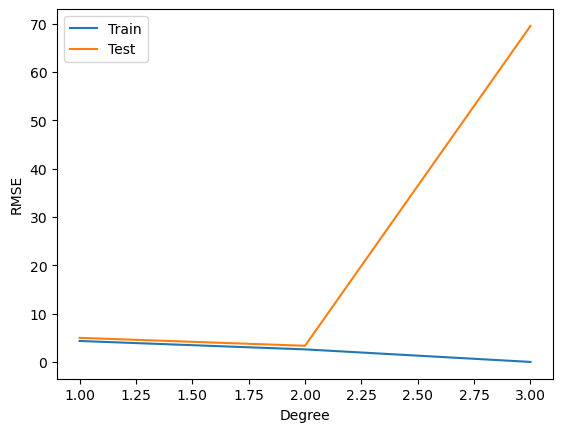

In [42]:
plt.plot(range(1, 4), train_RMSE_list[:3], label='Train')
plt.plot(range(1, 4), test_RMSE_list[:3], label='Test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Result: select degree = 2

### 7-2: Polynomial Features

In [43]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [44]:
poly_x = poly.fit_transform(X_scaling)
poly_x

array([[1.00000000e+00, 0.00000000e+00, 1.80000000e-01, ...,
        1.00000000e+00, 9.83656174e-02, 9.67579469e-03],
       [1.00000000e+00, 2.35922539e-04, 0.00000000e+00, ...,
        1.00000000e+00, 2.24273608e-01, 5.02986511e-02],
       [1.00000000e+00, 2.35697744e-04, 0.00000000e+00, ...,
        9.79579831e-01, 6.88981744e-02, 4.84591280e-03],
       ...,
       [1.00000000e+00, 6.11892474e-04, 0.00000000e+00, ...,
        1.00000000e+00, 1.18341404e-01, 1.40046880e-02],
       [1.00000000e+00, 1.16072990e-03, 0.00000000e+00, ...,
        9.82676920e-01, 1.42514466e-01, 2.06684135e-02],
       [1.00000000e+00, 4.61841693e-04, 0.00000000e+00, ...,
        1.00000000e+00, 1.86138015e-01, 3.46473605e-02]])

In [45]:
poly_x.shape

(493, 91)

### 7-3: train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=101)

In [47]:
X_train.shape

(345, 91)

In [48]:
X_test.shape

(148, 91)

### 7-4: Creat the Model

In [49]:
polymodel = LinearRegression()

### 7-5: Train the Model

In [50]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [51]:
polymodel.coef_

array([-4.23550011e-12, -1.10184669e+02, -1.50725777e+01, -9.68355220e+01,
        2.49437685e+01,  1.03612124e+02,  5.05940246e+01, -7.00140155e+01,
        1.70327881e+01,  4.94203083e+01,  1.71173263e+01,  3.60285817e+01,
       -7.65122981e+00,  1.16739929e+01,  1.54536235e+03,  1.35593745e+03,
       -3.33559623e+01,  2.54540392e+01, -2.25619029e+01, -6.51656788e+01,
        1.37934754e+03, -2.45352206e+03,  1.22118526e+02, -5.60358469e+00,
        2.99274838e+01, -8.58405864e+00, -1.51104013e+01, -3.37050364e+01,
        7.54373066e+00,  4.82248076e-01, -6.35340342e+00, -2.07172055e+01,
        3.12599684e+01, -9.92949077e+00,  3.01633100e+01, -2.25804472e+01,
        1.98387576e+01,  3.39027507e+01,  4.06556421e+01,  1.64289626e+01,
        6.39391711e+01,  8.13008678e+00,  9.92744523e-01,  1.24940787e+01,
        2.81856232e+01, -2.67737674e+01, -1.68938793e+01, -3.40210902e+01,
       -2.12915423e+01,  6.12389901e+01, -1.10642240e+01,  3.58430045e+01,
       -4.77028937e+01, -

In [52]:
polymodel.intercept_

-36.215143926287276

###  7-6: Prediction

In [53]:
y_pred_p = polymodel.predict(X_test)

### 7-7: Evaluation

In [54]:
MAE_p = metrics.mean_absolute_error(y_test, y_pred_p)
MAE_p

2.3255240930496313

In [55]:
MSE_p = metrics.mean_squared_error(y_test, y_pred_p)
MSE_p

11.172860199726241

In [56]:
RMSE_p = np.sqrt(MSE_p)
RMSE_p

3.342582863554207

In [57]:
Error_p = pd.DataFrame([MAE_p, MSE_p, RMSE_p], index=['MAE', 'MSE', 'RMSE'], columns=['Poly'])

In [58]:
Error_p

,Poly
MAE,2.325524
MSE,11.172860
RMSE,3.342583


# 8: Final Results

In [59]:
pd.concat([Error_LR, Error_p], axis=1)

,LR,Poly
MAE,3.332095,2.325524
MSE,24.831980,11.172860
RMSE,4.983170,3.342583


### The performance of the Polynomial Regression model (with degree 2) is better than the Linear Regression model in Boston House Price dataset.

# Finished!